# Statistical Testing

This notebook demonstrates a some statistical testing operations in *SciPy*.

The script loads the diabetes dataset from the *sklearn* package by default for demonstrative purposes.

In [1]:
# general imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load demo dataset
from sklearn.datasets import load_diabetes
dataset = load_diabetes()

## First check of data
*Print dataset description (only if available):*

In [3]:
if hasattr(dataset, 'DESCR'):
    print(dataset['DESCR'])

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

*Convert dataset to Pandas DataFrame (DF), add target data as new column, and check DF head:*

In [4]:
data_df = pd.DataFrame(data=dataset['data'])
data_df.columns=dataset['feature_names']
data_df['TARGET'] = dataset['target']
print(data_df.head(5))

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  TARGET  
0 -0.002592  0.019908 -0.017646   151.0  
1 -0.039493 -0.068330 -0.092204    75.0  
2 -0.002592  0.002864 -0.025930   141.0  
3  0.034309  0.022692 -0.009362   206.0  
4 -0.002592 -0.031991 -0.046641   135.0  


## Distribution of each Feature

- Is the distribution of each Feature Gaussian?

In [5]:
# Check for Gaussian Distribution with the Shapiro-Wilk Normality Test
from scipy.stats import shapiro

for col_name in data_df.columns: 
    # print(f"Data for {col_name}: {list(data_df[col_name])}")
    stat, p = shapiro(list(data_df[col_name]))
    if p > 0.05:
        print(f"The distribution of {col_name} seems to be Gaussian ({'stat=%.3f, p=%.3f' % (stat, p)}).")
    else:
        print(f"The distribution of {col_name} doesn't seem to be Gaussian ({'stat=%.3f, p=%.3f' % (stat, p)}).")
        
# Positive test: random sampling from a normal distribution:
normal_dist = np.random.normal(0, 0.1, 1000)
stat, p = shapiro(normal_dist)
if p > 0.05:
    print(f"\nPositive test for normal distribution was successful (p={round(p, 3)}).")
else:
    print(f"\nPositive test for normal distribution failed (p={round(p, 3)}).")

The distribution of age doesn't seem to be Gaussian (stat=0.982, p=0.000).
The distribution of sex doesn't seem to be Gaussian (stat=0.635, p=0.000).
The distribution of bmi doesn't seem to be Gaussian (stat=0.973, p=0.000).
The distribution of bp doesn't seem to be Gaussian (stat=0.984, p=0.000).
The distribution of s1 doesn't seem to be Gaussian (stat=0.990, p=0.005).
The distribution of s2 doesn't seem to be Gaussian (stat=0.988, p=0.001).
The distribution of s3 doesn't seem to be Gaussian (stat=0.963, p=0.000).
The distribution of s4 doesn't seem to be Gaussian (stat=0.924, p=0.000).
The distribution of s5 doesn't seem to be Gaussian (stat=0.991, p=0.010).
The distribution of s6 doesn't seem to be Gaussian (stat=0.993, p=0.041).
The distribution of TARGET doesn't seem to be Gaussian (stat=0.949, p=0.000).

Positive test for normal distribution was successful (p=0.338).


- Is the difference between the diabetes progression (target) for persons with a scaled bmi > 0.02 (overweight) statistically greater than for persons with a scaled bmi < 0.02 (underweight)?

In [6]:
# Data aggregation:
overweight = data_df[data_df['bmi'] > 0.02]
underweight = data_df[data_df['bmi'] < 0.02]

# Are the House Prices statistically different according to the Student's t-test? (p=0.05):
from scipy.stats import ttest_ind

overweight_dia_prog = overweight['TARGET']
underweight_dia_prog = underweight['TARGET']

# Print mean values and standard deviation for each group:
print(f"Average diabetes progression: overweight: {round(np.mean(overweight_dia_prog), 2)}+/-{round(np.std(overweight_dia_prog), 2)}, "
      f"underweight: {round(np.mean(underweight_dia_prog), 2)}+/-{round(np.std(underweight_dia_prog), 2)}.")

stat, p = ttest_ind(overweight_dia_prog, underweight_dia_prog)

print('\nResult of Student t-test: stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('\nThe samples probably belong to the same distribution.')
else:
    print('\nThe samples probably belong to different distributions.')

Average diabetes progression: overweight: 208.62+/-72.53, underweight: 127.82+/-65.22.

Result of Student t-test: stat=11.515, p=0.000

The samples probably belong to different distributions.


*Plot the two distributions including the Kernel Density Estimation for a graphical impression:*

C:\Users\forkfighter\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


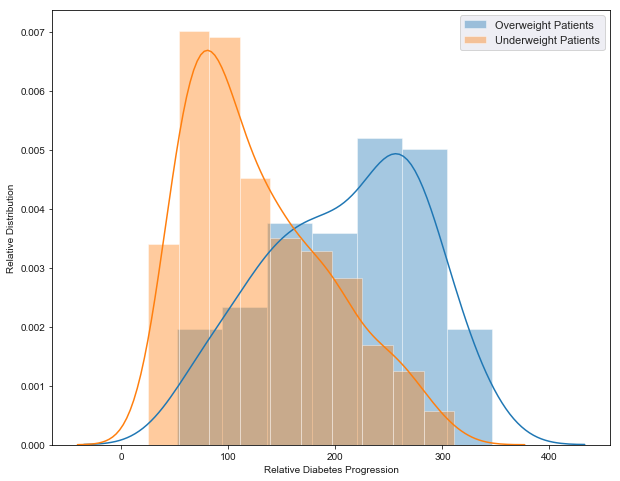

In [7]:
fig, ax = plt.subplots(figsize=(10,8))

sns.set()  # beautify plots

sns.distplot(overweight_dia_prog, ax=ax, label='Overweight Patients')
sns.distplot(underweight_dia_prog, ax=ax, label='Underweight Patients')

ax.set(xlabel='Relative Diabetes Progression', ylabel='Relative Distribution')
plt.legend()
plt.show()

*Analysis of Kurtosis and Skewness of a Single Distribution:*

<img src="https://s3-eu-west-1.amazonaws.com/ppreviews-plos-725668748/693627/preview.jpg" alt="Skewness and Kurtosis" style="width: 600px;"/>

(image from PLOS One, "Interpreting the properties of skewness and kurtosis in histograms.", Najafi *et al.*, 2013)

In [8]:
from scipy.stats import skewtest, kurtosistest

for name, prog in zip(['Overweight Patients', 'Underweight Patients'], [overweight_dia_prog, underweight_dia_prog]):
    skew_stat, skew_p = skewtest(prog)
    kurt_stat, kurt_p = kurtosistest(prog)
    
    print(f"\nAnalysis of the {name} distribution:")
    print(f"p value for kurtosis test: {kurt_p} (kurtosis %s the one of a normal distribution)." % ("doesn't match" if kurt_p < 0.05 else "matches"))
    if kurt_p < 0.05:
        print(f"The distribution has a %s kurtosis (distribution is %s than the normal distribution)." % ("positive" if kurt_stat > 0 else "negative", "more narrow" if kurt_stat > 0 else "wider"))
    print(f"p value for skewness test: {skew_p} (skewness %s the one of a normal distribution)." % ("doesn't match" if skew_p < 0.05 else "matches"))
    if skew_p < 0.05:
        print(f"The distribution has a %s skew (%s)." % ("positive" if skew_stat > 0 else "negative", "mean > median" if skew_stat > 0 else "mean < median"))
    
# get kurtosis and skewness for normal distribution created above:
skew_stat, skew_p = skewtest(normal_dist)
kurt_stat, kurt_p = kurtosistest(normal_dist)
print(f"\nControl values for normal distribution:\nSkewness test value: {round(skew_stat, 3)}, skewness p value: {round(skew_p, 3)}.\nKurtosis test value: {round(kurt_stat, 3)}, kurtosis p value: {round(kurt_p, 3)}")


Analysis of the Overweight Patients distribution:
p value for kurtosis test: 0.0015065678047235214 (kurtosis doesn't match the one of a normal distribution).
The distribution has a negative kurtosis (distribution is wider than the normal distribution).
p value for skewness test: 0.16641168953970853 (skewness matches the one of a normal distribution).

Analysis of the Underweight Patients distribution:
p value for kurtosis test: 0.1083085129035961 (kurtosis matches the one of a normal distribution).
p value for skewness test: 2.157117445785719e-06 (skewness doesn't match the one of a normal distribution).
The distribution has a positive skew (mean > median).

Control values for normal distribution:
Skewness test value: -0.967, skewness p value: 0.334.
Kurtosis test value: 0.051, kurtosis p value: 0.96
